<a href="https://colab.research.google.com/github/mdhasanali3/loan_risk_check/blob/main/loan_risk_factor_drop_null.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# notebook sections
1. import
2. dataset summery


# importing necessary liabraries


In [ ]:
import os
import pandas as pd  # First, we'll import Pandas, a data processing and CSV file I/O library
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading dataset
 dataset source
 
https://datascienceuwl.github.io/Project2018/TheData.html

In [ ]:
df_loan = pd.read_csv('/content/loans50k.csv', encoding='latin-1')
df_loan.head() # Output the first five rows.

,loanID,amount,term,rate,payment,grade,employment,length,home,income,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,36 months,0.14,272.07,C,Warehouseman,3 years,RENT,49966.0,...,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,36 months,0.10,354.89,B,Vice President,10+ years,MORTGAGE,50000.0,...,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,36 months,0.15,1220.33,D,Owner/Attorney,10+ years,RENT,360000.0,...,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,60 months,0.12,447.83,C,Analyst,2 years,MORTGAGE,60000.0,...,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,60 months,0.12,266.88,B,medical technician,10+ years,MORTGAGE,64000.0,...,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


# dataset summery 





In [ ]:
print(df_loan,5)

       loanID   amount        term  rate  payment grade          employment  \
0      188861   8000.0   36 months  0.14   272.07     C       Warehouseman    
1      517703  11000.0   36 months  0.10   354.89     B      Vice President   
2      268587  35000.0   36 months  0.15  1220.33     D      Owner/Attorney   
3      579902  20000.0   60 months  0.12   447.83     C             Analyst   
4      617630  12000.0   60 months  0.12   266.88     B  medical technician   
...       ...      ...         ...   ...      ...   ...                 ...   
49995  524083  13000.0   60 months  0.13   298.00     C                 CSA   
49996  426438  26050.0   60 months  0.22   719.33     F                 NaN   
49997  565011  30000.0   60 months  0.10   637.27     B               Owner   
49998  297410   7500.0   36 months  0.09   239.10     B           Associate   
49999  500393  12000.0   36 months  0.11   392.81     B                 NaN   

          length      home    income  ...  totalBal

## dataset descriptive information


In [ ]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       50000 non-null  int64  
 1   amount       49999 non-null  float64
 2   term         49999 non-null  object 
 3   rate         49999 non-null  float64
 4   payment      49999 non-null  float64
 5   grade        49999 non-null  object 
 6   employment   47215 non-null  object 
 7   length       47319 non-null  object 
 8   home         49999 non-null  object 
 9   income       49999 non-null  float64
 10  verified     49999 non-null  object 
 11  status       49999 non-null  object 
 12  reason       49999 non-null  object 
 13  state        49999 non-null  object 
 14  debtIncRat   49999 non-null  float64
 15  delinq2yr    49999 non-null  float64
 16  inq6mth      49999 non-null  float64
 17  openAcc      49999 non-null  float64
 18  pubRec       49999 non-null  float64
 19  revo

Insights
* total 22 floating type feature
* total 1 integer type feature
* total 9 object type feature

In [ ]:
df_loan.describe()


,loanID,amount,rate,payment,income,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
count,50000.000000,49999.000000,49999.000000,49999.000000,4.999900e+04,49999.000000,49999.000000,49999.000000,49999.000000,49999.000000,...,4.999900e+04,4.999900e+04,49999.000000,49999.000000,49511.000000,49479.000000,4.999900e+04,4.999900e+04,49999.000000,4.999900e+04
mean,327093.454600,15145.527911,0.130407,442.737519,7.617379e+04,18.731157,0.346167,0.639553,11.849217,0.232925,...,1.397782e+05,3.243594e+04,4.557831,13189.526651,9154.930945,63.188468,1.718866e+05,5.088178e+04,21190.290466,4.244567e+04
std,189495.851384,8527.772776,0.044192,244.835744,6.523503e+04,8.444506,0.907636,0.938869,5.524801,0.624342,...,1.526384e+05,3.269753e+04,3.079680,15561.787118,14296.865563,27.205695,1.697017e+05,4.731099e+04,21250.776922,4.329564e+04
min,16.000000,1000.000000,0.050000,30.540000,4.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,6.000000e+02,0.000000e+00,0.000000,0.000000e+00
25%,163310.250000,8500.000000,0.100000,265.840000,4.623850e+04,12.390000,0.000000,0.000000,8.000000,0.000000,...,3.061900e+04,1.400000e+04,2.000000,3170.000000,1235.000000,43.100000,5.000100e+04,2.211000e+04,7500.000000,1.500000e+04
50%,324662.500000,13800.000000,0.130000,385.790000,6.500000e+04,18.210000,0.000000,0.000000,11.000000,0.000000,...,8.107300e+04,2.400000e+04,4.000000,7356.000000,4052.000000,67.100000,1.120710e+05,3.862600e+04,14700.000000,3.200000e+04
75%,491706.250000,20000.000000,0.160000,578.680000,9.000000e+04,24.730000,0.000000,1.000000,15.000000,0.000000,...,2.094385e+05,4.030000e+04,6.000000,18223.500000,10868.500000,87.000000,2.498060e+05,6.390300e+04,27600.000000,5.679400e+04
max,656728.000000,35000.000000,0.290000,1407.010000,7.446395e+06,61.210000,15.000000,6.000000,76.000000,28.000000,...,2.552960e+06,1.060800e+06,50.000000,358652.000000,373005.000000,161.000000,2.711061e+06,1.094819e+06,560800.000000,1.027358e+06


### data quality check
#### dataset shape

#### null values

In [ ]:
print("row  ",df_loan.shape[0])
print("col    ",df_loan.shape[1])
print("missing   \n",df_loan.isnull().sum())


row   50000
col     32
missing   
 loanID            0
amount            1
term              1
rate              1
payment           1
grade             1
employment     2785
length         2681
home              1
income            1
verified          1
status            1
reason            1
state             1
debtIncRat        1
delinq2yr         1
inq6mth           1
openAcc           1
pubRec            1
revolRatio       19
totalAcc          1
totalPaid         1
totalBal          1
totalRevLim       1
accOpen24         1
avgBal            1
bcOpen          489
bcRatio         521
totalLim          1
totalRevBal       1
totalBcLim        1
totalIlLim        1
dtype: int64


Insights


---


null value contain col are
* employment
* length
* revolRatio
* bcOpen
* bc Ratio


#### column list
### unique values each columns
#### total missing values





# dropping null records


In [ ]:
grade_loan=df_loan.copy()


In [ ]:
grade_loan = grade_loan.dropna() 
df_loan = df_loan.dropna() 


In [ ]:
#Data encoding
grade_loan['grade'] = grade_loan['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [ ]:
grade_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 49998
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       46714 non-null  int64  
 1   amount       46714 non-null  float64
 2   term         46714 non-null  object 
 3   rate         46714 non-null  float64
 4   payment      46714 non-null  float64
 5   grade        46714 non-null  object 
 6   employment   46714 non-null  object 
 7   length       46714 non-null  object 
 8   home         46714 non-null  object 
 9   income       46714 non-null  float64
 10  verified     46714 non-null  object 
 11  status       46714 non-null  object 
 12  reason       46714 non-null  object 
 13  state        46714 non-null  object 
 14  debtIncRat   46714 non-null  float64
 15  delinq2yr    46714 non-null  float64
 16  inq6mth      46714 non-null  float64
 17  openAcc      46714 non-null  float64
 18  pubRec       46714 non-null  float64
 19  revo

In [ ]:
grade_loan.describe()


,loanID,amount,rate,payment,income,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
count,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,...,4.671400e+04,4.671400e+04,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,46714.000000,46714.000000,46714.000000
mean,326901.441431,15342.429464,0.130209,447.475290,7.755333e+04,18.677516,0.346705,0.641157,11.972171,0.225350,...,1.424781e+05,3.271266e+04,4.577621,13308.496425,9144.511153,63.353772,1.748247e+05,52023.914158,21531.246157,43545.898189
std,189922.890203,8542.639785,0.044255,245.254445,6.630007e+04,8.410715,0.907830,0.940866,5.545394,0.613409,...,1.537507e+05,3.217022e+04,3.081678,15535.903900,14171.693125,27.134613,1.707713e+05,47351.460193,21072.456424,43528.790210
min,16.000000,1000.000000,0.050000,30.540000,1.000000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,3.000000e+02,0.000000,0.000000,0.000000,0.000000,7.000000e+02,0.000000,0.000000,0.000000
25%,161636.250000,9000.000000,0.100000,269.520000,4.800000e+04,12.360000,0.000000,0.000000,8.000000,0.000000,...,3.173225e+04,1.430000e+04,2.000000,3250.000000,1243.250000,43.400000,5.152150e+04,22904.250000,7800.000000,16000.000000
50%,325205.000000,14000.000000,0.130000,391.280000,6.500000e+04,18.150000,0.000000,0.000000,11.000000,0.000000,...,8.426600e+04,2.430000e+04,4.000000,7536.500000,4077.000000,67.300000,1.152945e+05,39601.000000,15100.000000,33000.000000
75%,492359.000000,20000.000000,0.160000,586.745000,9.200000e+04,24.640000,0.000000,1.000000,15.000000,0.000000,...,2.129392e+05,4.070000e+04,6.000000,18419.750000,10915.750000,87.100000,2.536075e+05,65289.000000,28000.000000,58169.500000
max,656727.000000,35000.000000,0.290000,1407.010000,7.446395e+06,61.210000,15.000000,6.000000,76.000000,28.000000,...,2.552960e+06,1.013700e+06,50.000000,358652.000000,373005.000000,161.000000,2.661185e+06,928934.000000,373100.000000,689474.000000


In [ ]:
print("row  ",grade_loan.shape[0])
print("col    ",grade_loan.shape[1])
print("missing   \n",grade_loan.isnull().sum())

row   46714
col     32
missing   
 loanID         0
amount         0
term           0
rate           0
payment        0
grade          0
employment     0
length         0
home           0
income         0
verified       0
status         0
reason         0
state          0
debtIncRat     0
delinq2yr      0
inq6mth        0
openAcc        0
pubRec         0
revolRatio     0
totalAcc       0
totalPaid      0
totalBal       0
totalRevLim    0
accOpen24      0
avgBal         0
bcOpen         0
bcRatio        0
totalLim       0
totalRevBal    0
totalBcLim     0
totalIlLim     0
dtype: int64


In [ ]:
print ("\nfeatures/columns : \n" ,grade_loan.columns.tolist())
print ("\nunique values :  \n",grade_loan.nunique())
print ("\ntotal missing values :  ", grade_loan.isnull().sum().values.sum())


features/columns : 
 ['loanID', 'amount', 'term', 'rate', 'payment', 'grade', 'employment', 'length', 'home', 'income', 'verified', 'status', 'reason', 'state', 'debtIncRat', 'delinq2yr', 'inq6mth', 'openAcc', 'pubRec', 'revolRatio', 'totalAcc', 'totalPaid', 'totalBal', 'totalRevLim', 'accOpen24', 'avgBal', 'bcOpen', 'bcRatio', 'totalLim', 'totalRevBal', 'totalBcLim', 'totalIlLim']

unique values :  
 loanID         46714
amount          1251
term               2
rate              25
payment        14592
grade              7
employment     21203
length            11
home               3
income          4288
verified           3
status             7
reason            13
state             49
debtIncRat      3912
delinq2yr         16
inq6mth            7
openAcc           58
pubRec            16
revolRatio       121
totalAcc         102
totalPaid      44627
totalBal       42500
totalRevLim     2850
accOpen24         33
avgBal         23515
bcOpen         19018
bcRatio         1111
totalL

## starting visualization 

**heatmap**

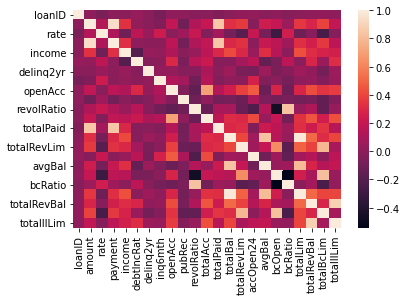

In [ ]:
sns.heatmap(grade_loan.corr())


In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(grade_loan.corr(), annot = True, cmap="RdBu")
plt.show()

## plotting numerical column with grade(risk factor) 

1. distplot
2. box
3. jointplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


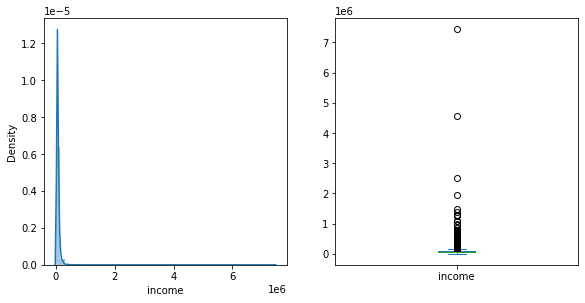

Text(0.5, 1.0, 'income  by grade')

<Figure size 720x432 with 0 Axes>

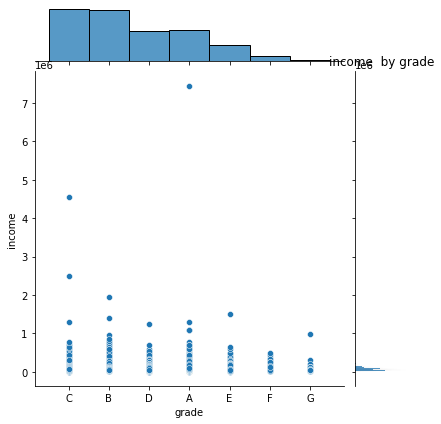

In [ ]:
plt.subplot(241)
sns.distplot(df_loan['income'])
plt.subplot(242)
df_loan['income'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='income',data=df_loan)
plt.title('income  by grade')




/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


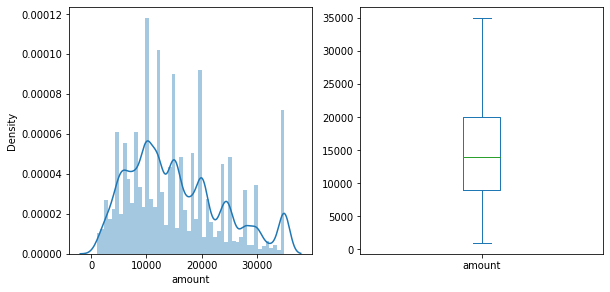

Text(0.5, 1.0, 'requested loan amount  by grade')

<Figure size 720x432 with 0 Axes>

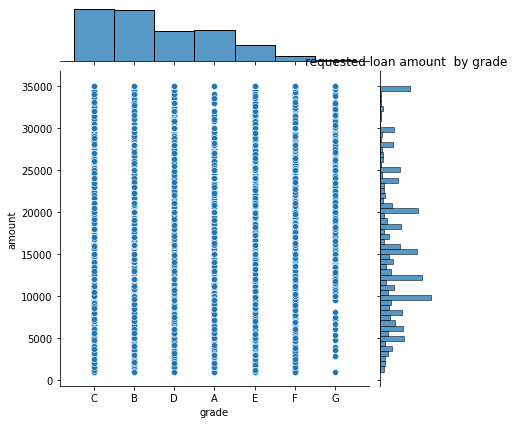

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['amount'])
plt.subplot(242)
df_loan['amount'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='amount',data=df_loan)
plt.title('requested loan amount  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


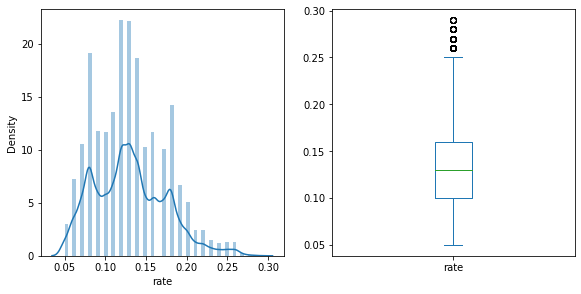

Text(0.5, 1.0, 'interest rate  by grade')

<Figure size 720x432 with 0 Axes>

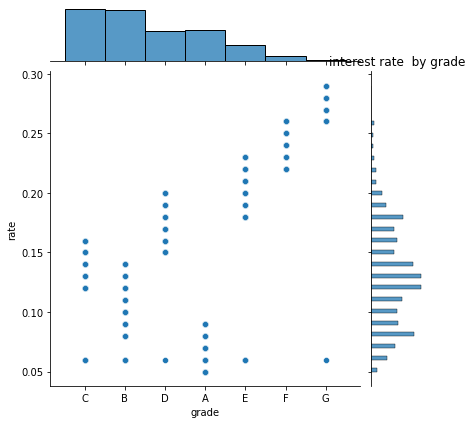

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['rate'])
plt.subplot(242)
df_loan['rate'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='rate',data=df_loan)
plt.title('interest rate  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


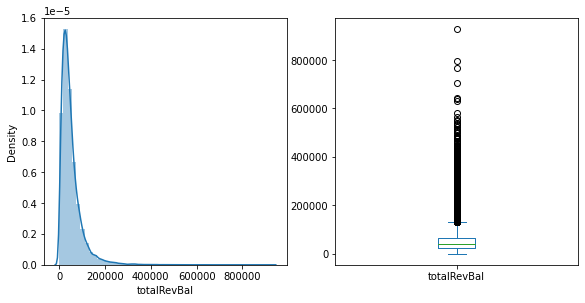

Text(0.5, 1.0, 'total credit balance except mortgages  by grade')

<Figure size 720x432 with 0 Axes>

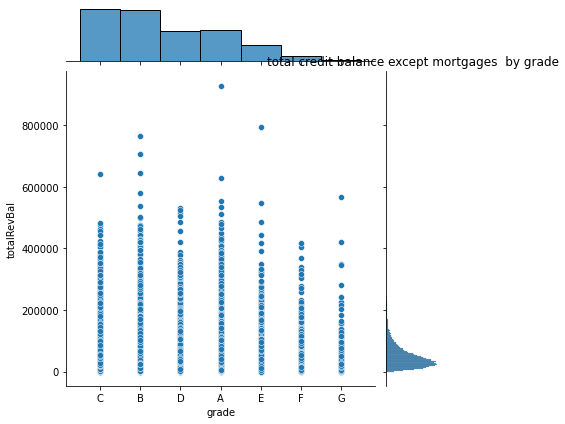

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['totalRevBal'])
plt.subplot(242)
df_loan['totalRevBal'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='totalRevBal',data=df_loan)
plt.title('total credit balance except mortgages  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


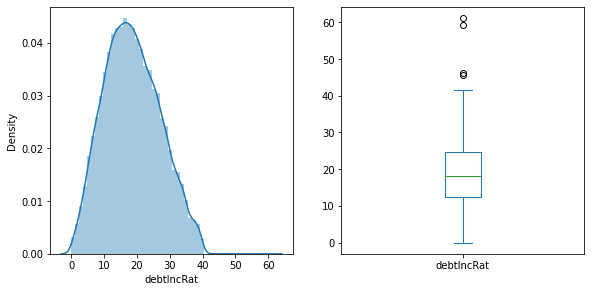

Text(0.5, 1.0, 'ratio monthly non-mortgage debt payment to monthly income  by grade')

<Figure size 720x432 with 0 Axes>

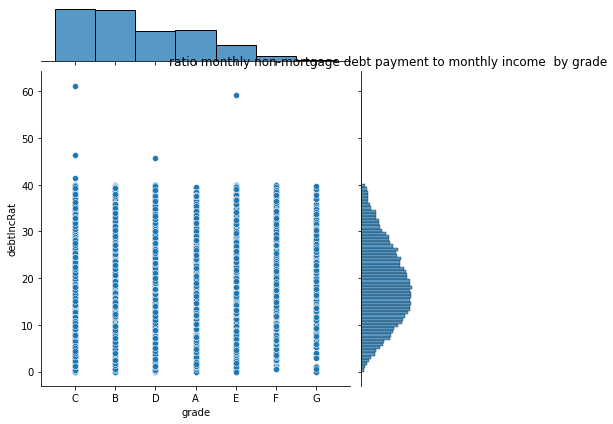

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['debtIncRat'])
plt.subplot(242)
df_loan['debtIncRat'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='debtIncRat',data=df_loan)
plt.title('ratio monthly non-mortgage debt payment to monthly income  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


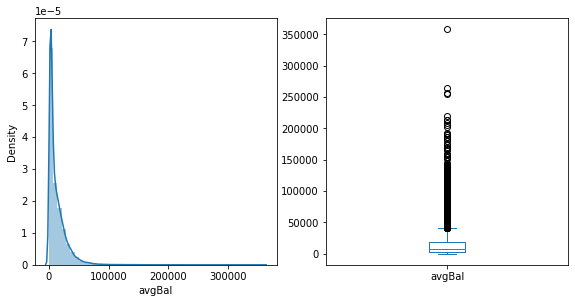

Text(0.5, 1.0, 'average balance per account  by grade')

<Figure size 720x432 with 0 Axes>

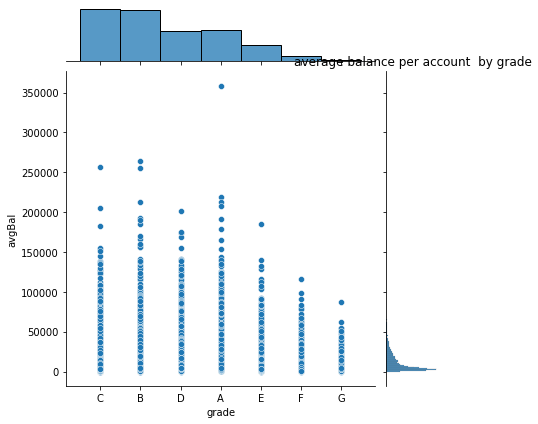

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['avgBal'])
plt.subplot(242)
df_loan['avgBal'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='avgBal',data=df_loan)
plt.title('average balance per account  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


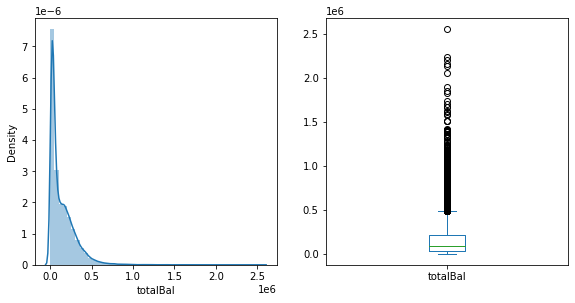

Text(0.5, 1.0, 'total current balance of all credit accounts  by grade')

<Figure size 720x432 with 0 Axes>

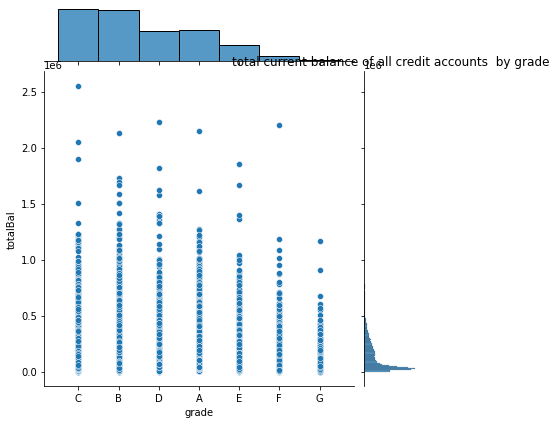

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['totalBal'])
plt.subplot(242)
df_loan['totalBal'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='totalBal',data=df_loan)
plt.title('total current balance of all credit accounts  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


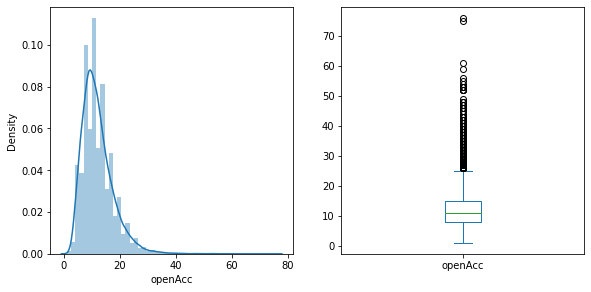

Text(0.5, 1.0, 'tnumber of open credit lines  by grade')

<Figure size 720x432 with 0 Axes>

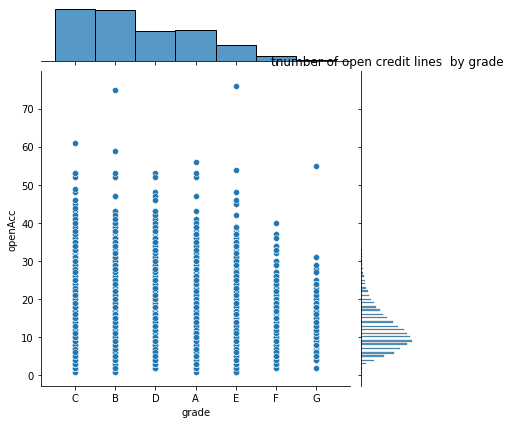

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['openAcc'])
plt.subplot(242)
df_loan['openAcc'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='openAcc',data=df_loan)
plt.title('tnumber of open credit lines  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


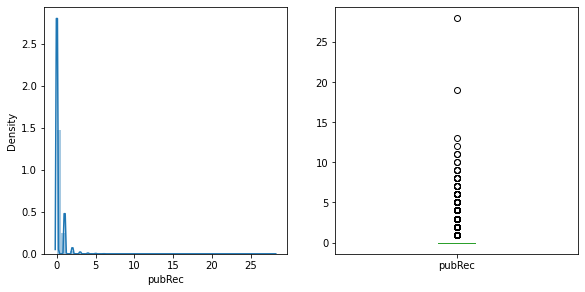

Text(0.5, 1.0, 'number of derogatory public records including bankruptcy filings, tax liens, etc  by grade')

<Figure size 720x432 with 0 Axes>

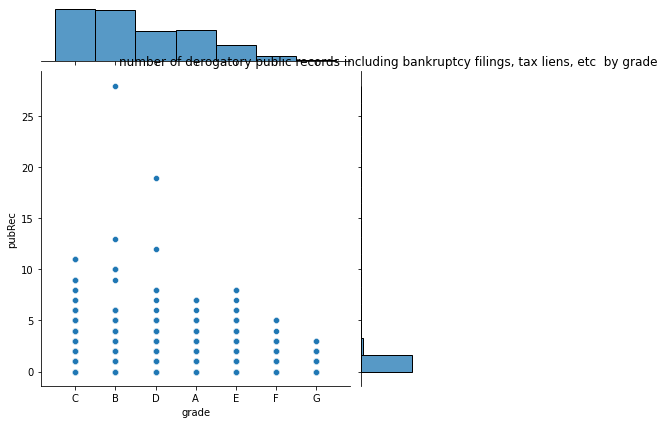

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['pubRec'])
plt.subplot(242)
df_loan['pubRec'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='pubRec',data=df_loan)
plt.title('number of derogatory public records including bankruptcy filings, tax liens, etc  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


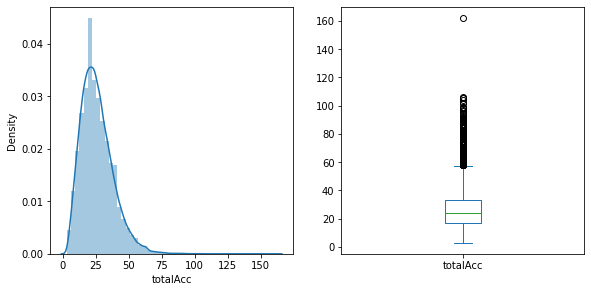

Text(0.5, 1.0, 'total number of credit lines in file, includes both open and closed accounts  by grade')

<Figure size 720x432 with 0 Axes>

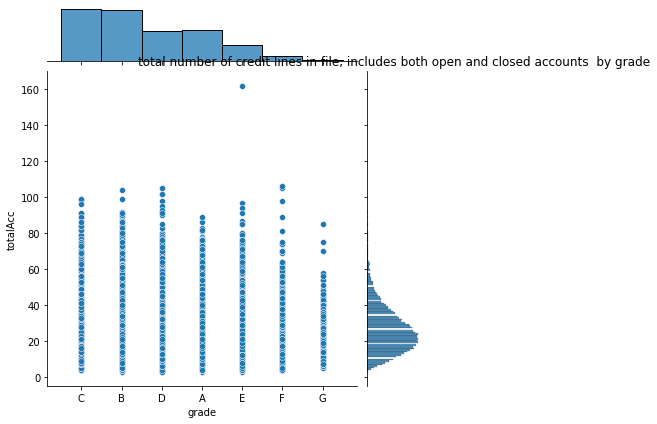

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['totalAcc'])
plt.subplot(242)
df_loan['totalAcc'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='totalAcc',data=df_loan)
plt.title('total number of credit lines in file, includes both open and closed accounts  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


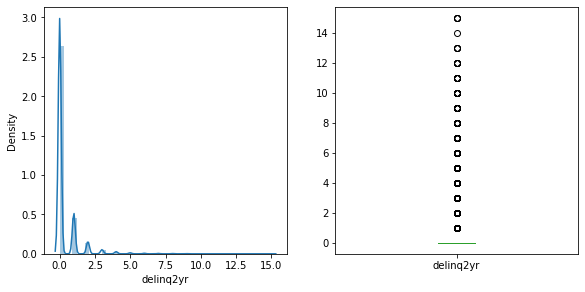

Text(0.5, 1.0, '\tnumber of 30+ day late payments in last two years  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

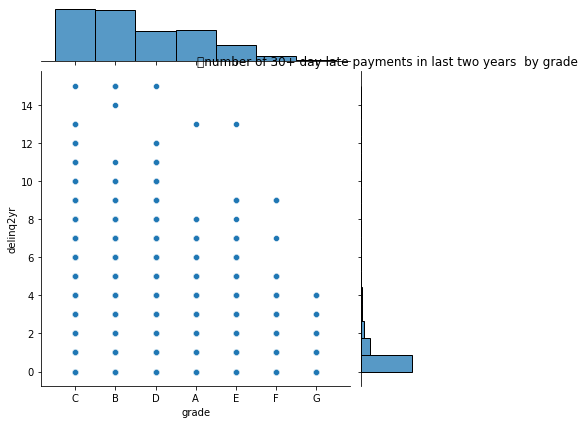

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['delinq2yr'])
plt.subplot(242)
df_loan['delinq2yr'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='delinq2yr',data=df_loan)
plt.title('	number of 30+ day late payments in last two years  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


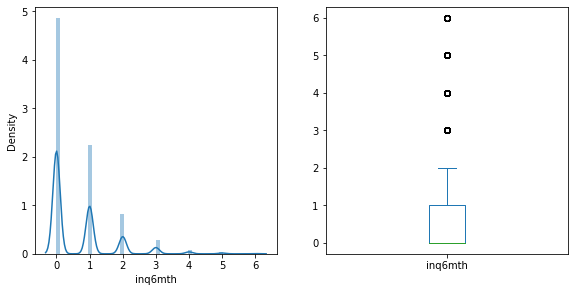

Text(0.5, 1.0, '\tnumber of credit checks in the past 6 months  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

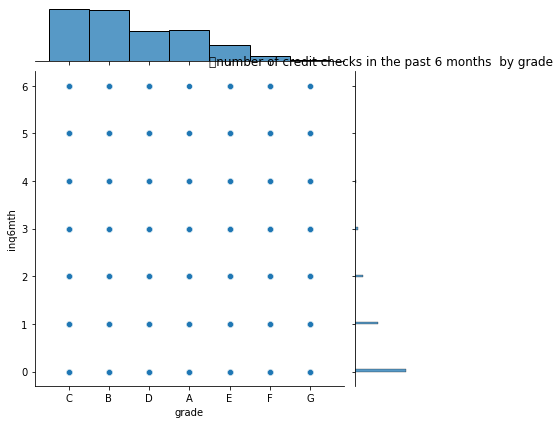

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['inq6mth'])
plt.subplot(242)
df_loan['inq6mth'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='inq6mth',data=df_loan)
plt.title('	number of credit checks in the past 6 months  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


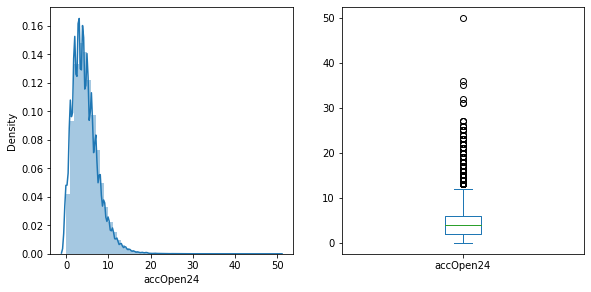

Text(0.5, 1.0, '\thow many accounts were opened in the past 24 months  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

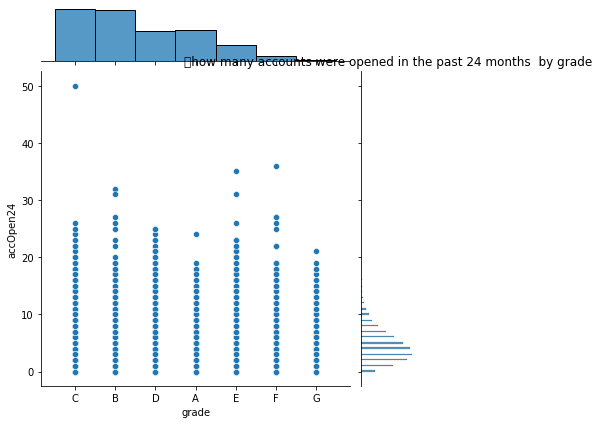

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['accOpen24'])
plt.subplot(242)
df_loan['accOpen24'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='accOpen24',data=df_loan)
plt.title('	how many accounts were opened in the past 24 months  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


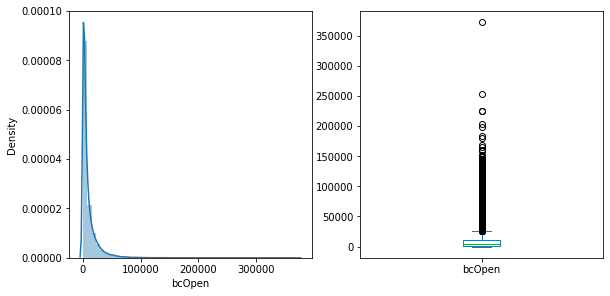

Text(0.5, 1.0, '\ttotal unused credit on credit cards  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

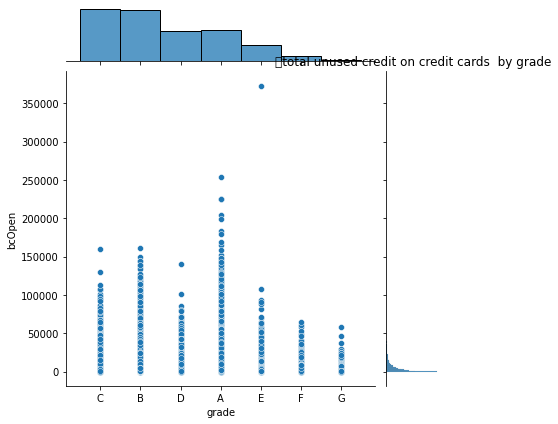

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['bcOpen'])
plt.subplot(242)
df_loan['bcOpen'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='bcOpen',data=df_loan)
plt.title('	total unused credit on credit cards  by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


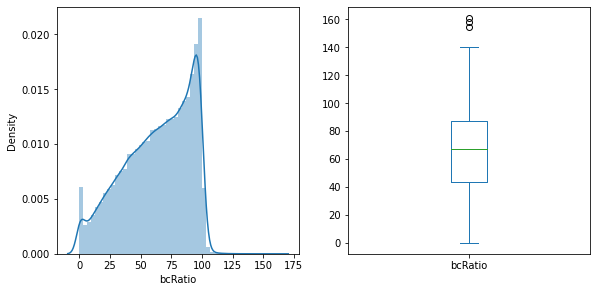

Text(0.5, 1.0, '\tratio of total credit card balance to total credit card lmits by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

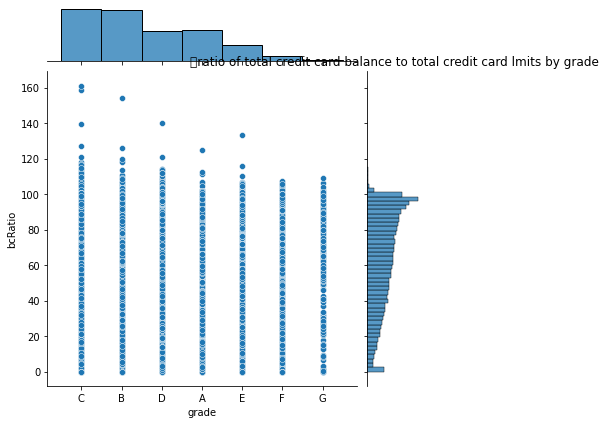

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['bcRatio'])
plt.subplot(242)
df_loan['bcRatio'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='bcRatio',data=df_loan)
plt.title('	ratio of total credit card balance to total credit card lmits by grade')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


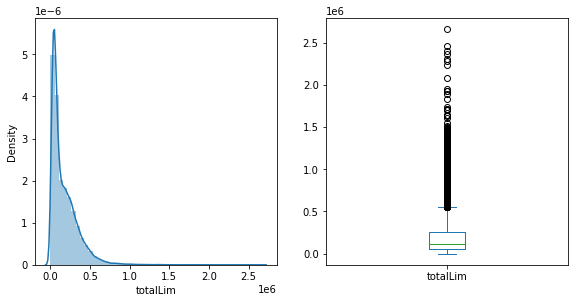

Text(0.5, 1.0, '\ttotal credit limits  by grade')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

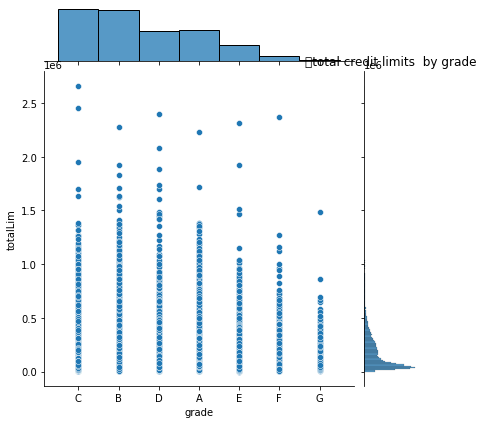

In [ ]:
plt.figure(1)
plt.subplot(241)
sns.distplot(df_loan['totalLim'])
plt.subplot(242)
df_loan['totalLim'].plot.box(figsize = (20,10))
plt.show()

plt.figure(figsize=(10,6))
sns.jointplot(x='grade',y='totalLim',data=df_loan)
plt.title('	total credit limits  by grade')

## plotting all numerical column with pairplot

* transforming grade (object -> numeric)

In [ ]:
grade_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46714 entries, 0 to 49998
Data columns (total 32 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   loanID       46714 non-null  int64  
 1   amount       46714 non-null  float64
 2   term         46714 non-null  object 
 3   rate         46714 non-null  float64
 4   payment      46714 non-null  float64
 5   grade        46714 non-null  object 
 6   employment   46714 non-null  object 
 7   length       46714 non-null  object 
 8   home         46714 non-null  object 
 9   income       46714 non-null  float64
 10  verified     46714 non-null  object 
 11  status       46714 non-null  object 
 12  reason       46714 non-null  object 
 13  state        46714 non-null  object 
 14  debtIncRat   46714 non-null  float64
 15  delinq2yr    46714 non-null  float64
 16  inq6mth      46714 non-null  float64
 17  openAcc      46714 non-null  float64
 18  pubRec       46714 non-null  float64
 19  revo

In [ ]:
grade_loan.head()

,loanID,amount,term,rate,payment,grade,employment,length,home,income,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
0,188861,8000.0,36 months,0.14,272.07,C,Warehouseman,3 years,RENT,49966.0,...,48054.0,8100.0,8.0,4369.0,43.0,95.7,60629.0,48054.0,1000.0,52529.0
1,517703,11000.0,36 months,0.10,354.89,B,Vice President,10+ years,MORTGAGE,50000.0,...,265838.0,33400.0,4.0,22153.0,19756.0,37.5,297500.0,11844.0,31600.0,0.0
2,268587,35000.0,36 months,0.15,1220.33,D,Owner/Attorney,10+ years,RENT,360000.0,...,850150.0,83000.0,2.0,121450.0,7686.0,83.2,907300.0,173260.0,83000.0,100000.0
3,579902,20000.0,60 months,0.12,447.83,C,Analyst,2 years,MORTGAGE,60000.0,...,20671.0,14200.0,8.0,1723.0,11061.0,1.2,46964.0,20671.0,11200.0,32764.0
4,617630,12000.0,60 months,0.12,266.88,B,medical technician,10+ years,MORTGAGE,64000.0,...,128034.0,14600.0,3.0,18291.0,5904.0,58.4,134600.0,8475.0,14200.0,0.0


# detecting outlier for bc open & ratio
* bcOpen & bdRatio have lots of null value need to replace 



In [ ]:
grade_loan.describe()

,loanID,amount,rate,payment,income,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
count,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,46714.000000,46714.000000,46714.000000,46714.000000,46714.000000,...,4.671400e+04,4.671400e+04,46714.000000,46714.000000,46714.000000,46714.000000,4.671400e+04,46714.000000,46714.000000,46714.000000
mean,326901.441431,15342.429464,0.130209,447.475290,7.755333e+04,18.677516,0.346705,0.641157,11.972171,0.225350,...,1.424781e+05,3.271266e+04,4.577621,13308.496425,9144.511153,63.353772,1.748247e+05,52023.914158,21531.246157,43545.898189
std,189922.890203,8542.639785,0.044255,245.254445,6.630007e+04,8.410715,0.907830,0.940866,5.545394,0.613409,...,1.537507e+05,3.217022e+04,3.081678,15535.903900,14171.693125,27.134613,1.707713e+05,47351.460193,21072.456424,43528.790210
min,16.000000,1000.000000,0.050000,30.540000,1.000000e+04,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,3.000000e+02,0.000000,0.000000,0.000000,0.000000,7.000000e+02,0.000000,0.000000,0.000000
25%,161636.250000,9000.000000,0.100000,269.520000,4.800000e+04,12.360000,0.000000,0.000000,8.000000,0.000000,...,3.173225e+04,1.430000e+04,2.000000,3250.000000,1243.250000,43.400000,5.152150e+04,22904.250000,7800.000000,16000.000000
50%,325205.000000,14000.000000,0.130000,391.280000,6.500000e+04,18.150000,0.000000,0.000000,11.000000,0.000000,...,8.426600e+04,2.430000e+04,4.000000,7536.500000,4077.000000,67.300000,1.152945e+05,39601.000000,15100.000000,33000.000000
75%,492359.000000,20000.000000,0.160000,586.745000,9.200000e+04,24.640000,0.000000,1.000000,15.000000,0.000000,...,2.129392e+05,4.070000e+04,6.000000,18419.750000,10915.750000,87.100000,2.536075e+05,65289.000000,28000.000000,58169.500000
max,656727.000000,35000.000000,0.290000,1407.010000,7.446395e+06,61.210000,15.000000,6.000000,76.000000,28.000000,...,2.552960e+06,1.013700e+06,50.000000,358652.000000,373005.000000,161.000000,2.661185e+06,928934.000000,373100.000000,689474.000000


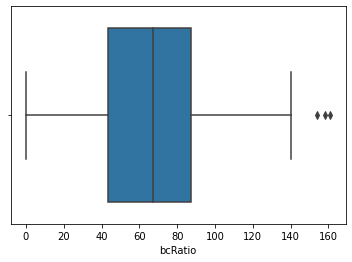

In [ ]:
sns.boxplot(x=grade_loan['bcRatio'])

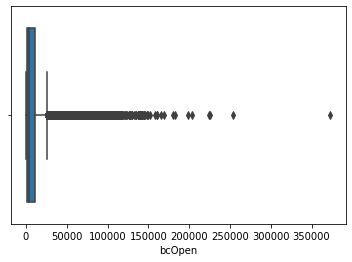

In [ ]:
sns.boxplot(x=grade_loan['bcOpen'])


Insights
* filling with mean value

In [ ]:
grade_loan['bcOpen'].fillna(grade_loan['bcOpen'].mean(), inplace = True)
grade_loan['bcRatio'].fillna(grade_loan['bcRatio'].mean(), inplace = True)

In [ ]:
grade_loan.isnull().sum()

loanID         0
amount         0
term           0
rate           0
payment        0
grade          0
employment     0
length         0
home           0
income         0
verified       0
status         0
reason         0
state          0
debtIncRat     0
delinq2yr      0
inq6mth        0
openAcc        0
pubRec         0
revolRatio     0
totalAcc       0
totalPaid      0
totalBal       0
totalRevLim    0
accOpen24      0
avgBal         0
bcOpen         0
bcRatio        0
totalLim       0
totalRevBal    0
totalBcLim     0
totalIlLim     0
dtype: int64

# pairplot for numerical value lets see pattern


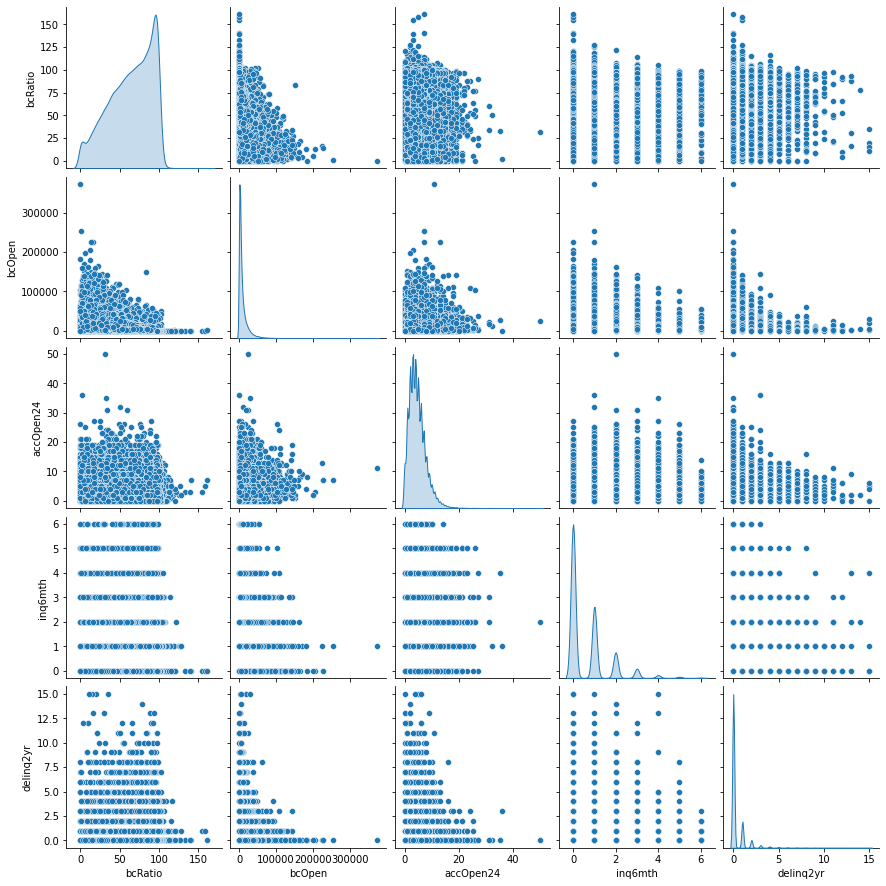

In [ ]:
# Create a new dataframe of only numeric variables:

loan_num=grade_loan[['bcRatio','bcOpen','accOpen24','inq6mth','delinq2yr','grade']]
sns.pairplot(loan_num, diag_kind='kde')
plt.show()

Insights
* deliinq2yr + bcRatio upto 7.5 is safe

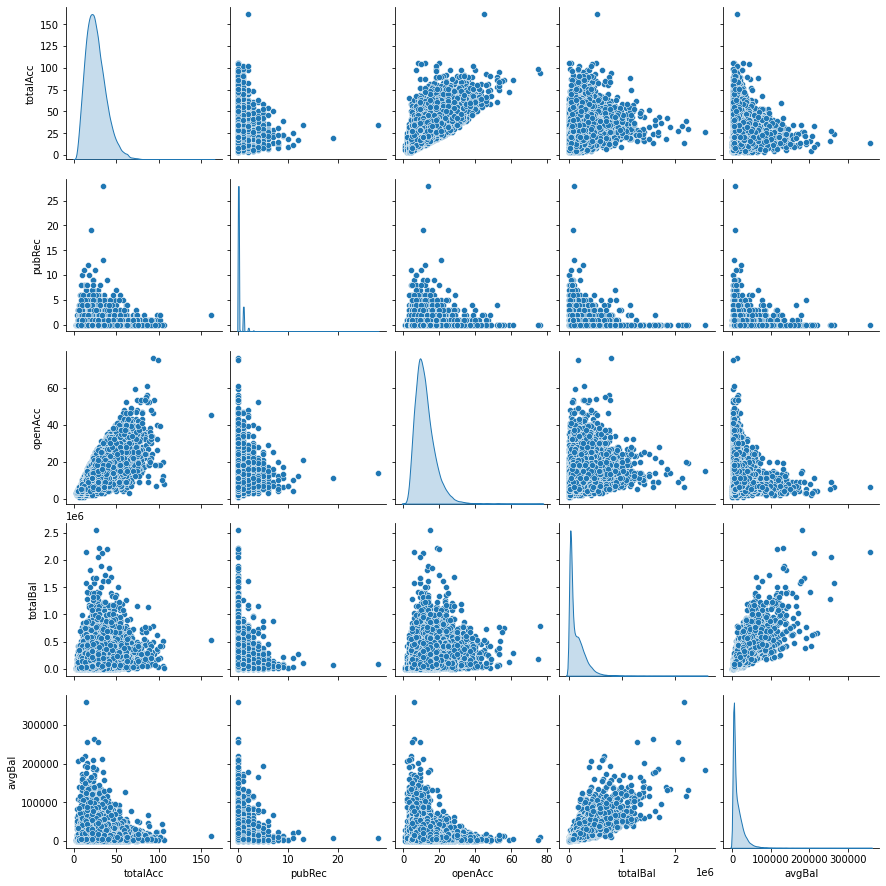

In [ ]:
# Create a new dataframe of only numeric variables:

loan_num1=grade_loan[['totalAcc','pubRec','openAcc','totalBal','avgBal','grade']]
sns.pairplot(loan_num1, diag_kind='kde')
plt.show()

Insights
* totalAcc + openAcc linear relation
* totalBal + avgBal linear relation

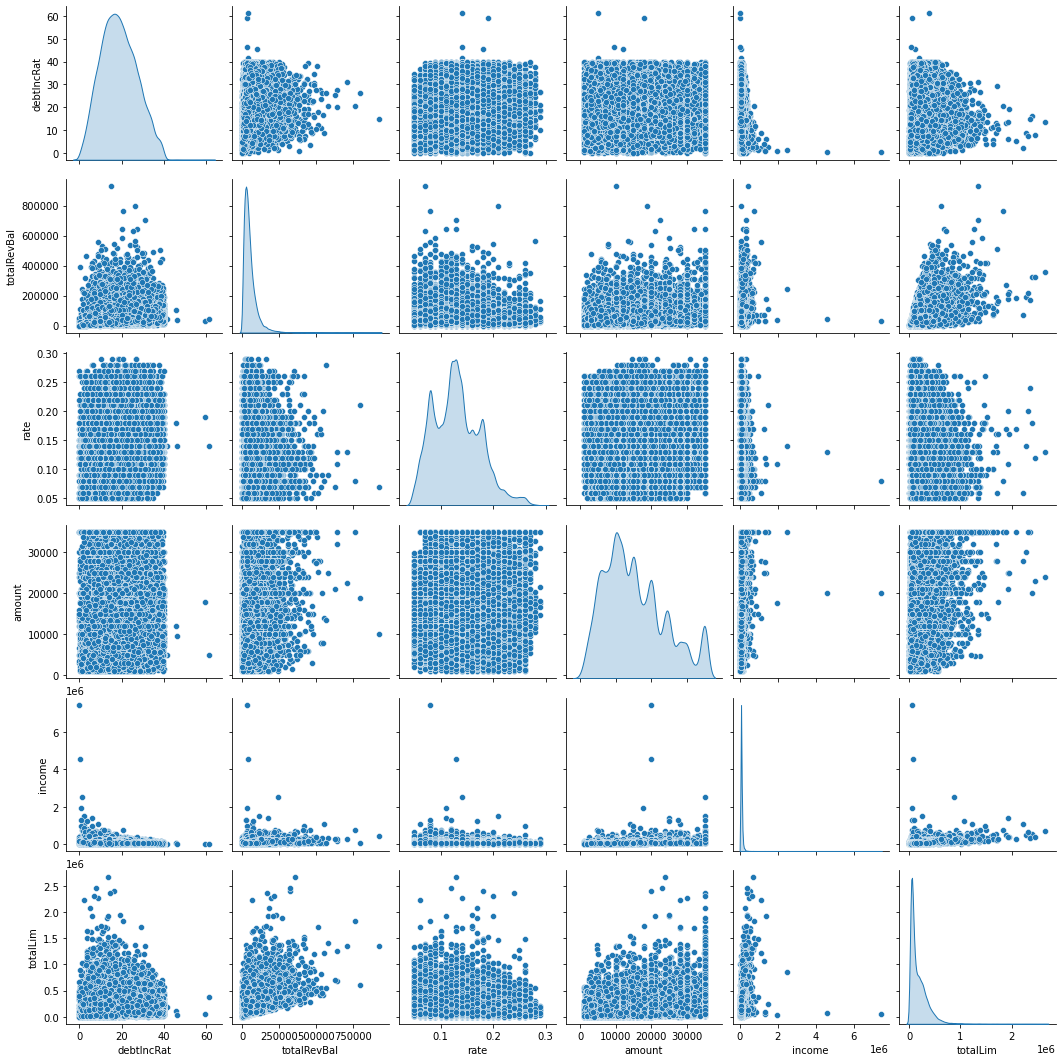

In [ ]:
loan_nu1m=grade_loan[['debtIncRat','totalRevBal','rate','amount','income','totalLim','grade']]
sns.pairplot(loan_nu1m, diag_kind='kde')
plt.show()


Insights
* totalRavBal + totalLim

In [ ]:
grade_loan.corr()

,loanID,amount,rate,payment,income,debtIncRat,delinq2yr,inq6mth,openAcc,pubRec,...,totalBal,totalRevLim,accOpen24,avgBal,bcOpen,bcRatio,totalLim,totalRevBal,totalBcLim,totalIlLim
loanID,1.000000,0.013393,-0.059015,0.000468,-0.001336,0.040660,-0.006359,-0.066236,0.014101,0.012209,...,-0.008963,0.018654,0.027310,-0.011590,0.017344,-0.022829,-0.004552,0.017541,0.019781,0.018161
amount,0.013393,1.000000,0.134313,0.941744,0.332589,0.025463,-0.006214,-0.040227,0.186945,-0.101757,...,0.327232,0.366718,-0.016630,0.239195,0.204766,0.059054,0.353829,0.283763,0.397577,0.192389
rate,-0.059015,0.134313,1.000000,0.117063,-0.092599,0.176332,0.049288,0.229277,-0.006301,0.069241,...,-0.075397,-0.186877,0.209754,-0.076525,-0.292185,0.244284,-0.110535,-0.014588,-0.248932,-0.018230
payment,0.000468,0.941744,0.117063,1.000000,0.327016,0.007767,0.001570,-0.005330,0.171566,-0.085795,...,0.297315,0.334932,0.002204,0.214802,0.176286,0.069239,0.321534,0.258905,0.357752,0.171404
income,-0.001336,0.332589,-0.092599,0.327016,1.000000,-0.193471,0.041530,0.026077,0.126404,-0.011817,...,0.415275,0.296214,0.042845,0.322100,0.152295,-0.002632,0.433734,0.316908,0.273186,0.255358
debtIncRat,0.040660,0.025463,0.176332,0.007767,-0.193471,1.000000,-0.020802,-0.003406,0.297436,-0.065199,...,-0.012036,0.087295,0.163904,-0.139056,-0.064254,0.173271,0.001672,0.285490,0.049284,0.314861
delinq2yr,-0.006359,-0.006214,0.049288,0.001570,0.041530,-0.020802,1.000000,0.024307,0.034009,-0.018943,...,0.059916,-0.057533,-0.066313,0.054426,-0.054683,-0.015061,0.062707,0.023876,-0.082999,0.059251
inq6mth,-0.066236,-0.040227,0.229277,-0.005330,0.026077,-0.003406,0.024307,1.000000,0.130716,0.090266,...,0.016977,-0.001572,0.267780,-0.032022,-0.004120,-0.075926,0.017095,0.032080,-0.028888,0.045247
openAcc,0.014101,0.186945,-0.006301,0.171566,0.126404,0.297436,0.034009,0.130716,1.000000,-0.031964,...,0.249397,0.385793,0.467787,-0.116577,0.278098,-0.105044,0.285533,0.422462,0.338149,0.372954
pubRec,0.012209,-0.101757,0.069241,-0.085795,-0.011817,-0.065199,-0.018943,0.090266,-0.031964,1.000000,...,-0.073306,-0.119210,0.109276,-0.052558,-0.084617,-0.061461,-0.080833,-0.070679,-0.144666,-0.029297


# categorical feature 

1. crosstab bar stacked
2. boxplot


### barplot

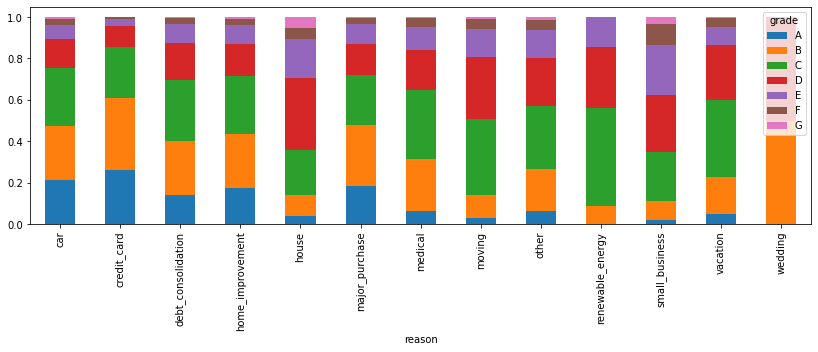

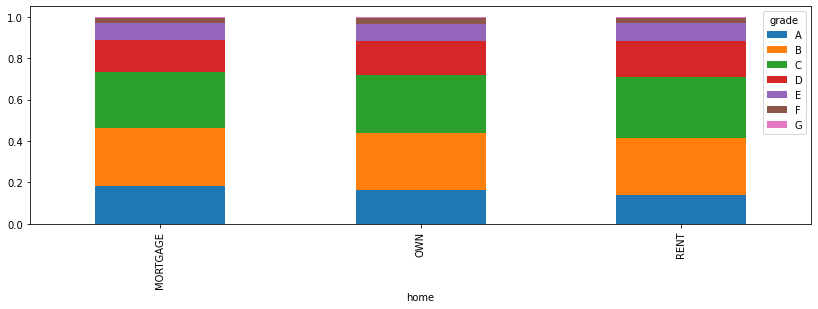

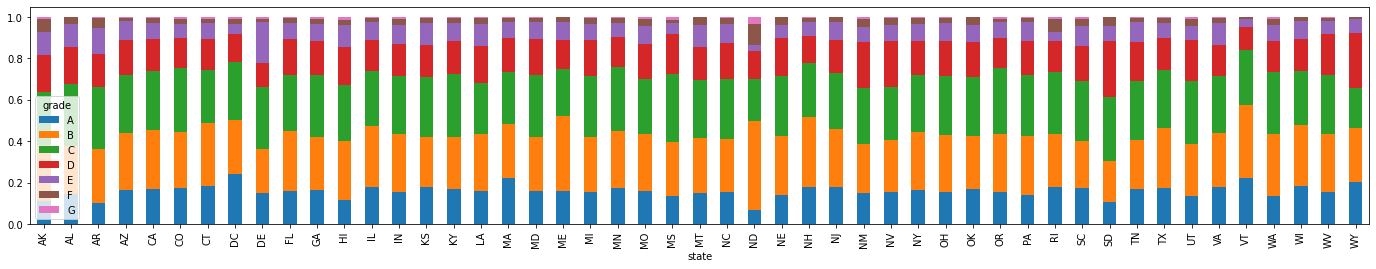

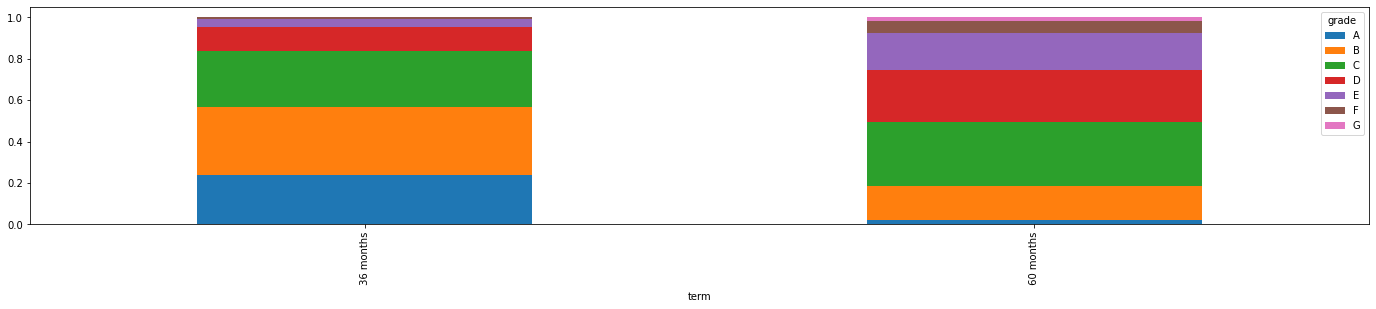

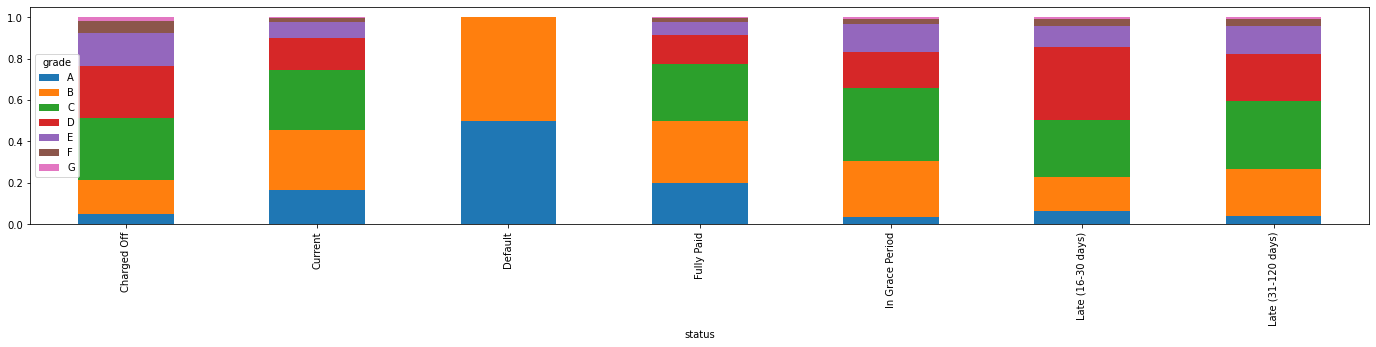

In [ ]:
# employment = pd.crosstab(df_loan['employment'], df_loan['grade'])
# employment.div(employment.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
# plt.show()

# length = pd.crosstab(df_loan['length'], df_loan['grade'])
# length.div(length.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (4,4))
# plt.show()

reason = pd.crosstab(df_loan['reason'], df_loan['grade'])
reason.div(reason.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (14,4))
plt.show()

home = pd.crosstab(df_loan['home'], df_loan['grade'])
home.div(home.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (14,4))
plt.show()

state = pd.crosstab(df_loan['state'], df_loan['grade'])
state.div(state.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (24,4))
plt.show()

term = pd.crosstab(df_loan['term'], df_loan['grade'])
term.div(term.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (24,4))
plt.show()

status = pd.crosstab(df_loan['status'], df_loan['grade'])
status.div(status.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (24,4))
plt.show()


## box plot

In [ ]:
df_loan.nunique()

loanID         46714
amount          1251
term               2
rate              25
payment        14592
grade              7
employment     21203
length            11
home               3
income          4288
verified           3
status             7
reason            13
state             49
debtIncRat      3912
delinq2yr         16
inq6mth            7
openAcc           58
pubRec            16
revolRatio       121
totalAcc         102
totalPaid      44627
totalBal       42500
totalRevLim     2850
accOpen24         33
avgBal         23515
bcOpen         19018
bcRatio         1111
totalLim       40431
totalRevBal    37441
totalBcLim      1839
totalIlLim     31668
dtype: int64

TypeError: ignored

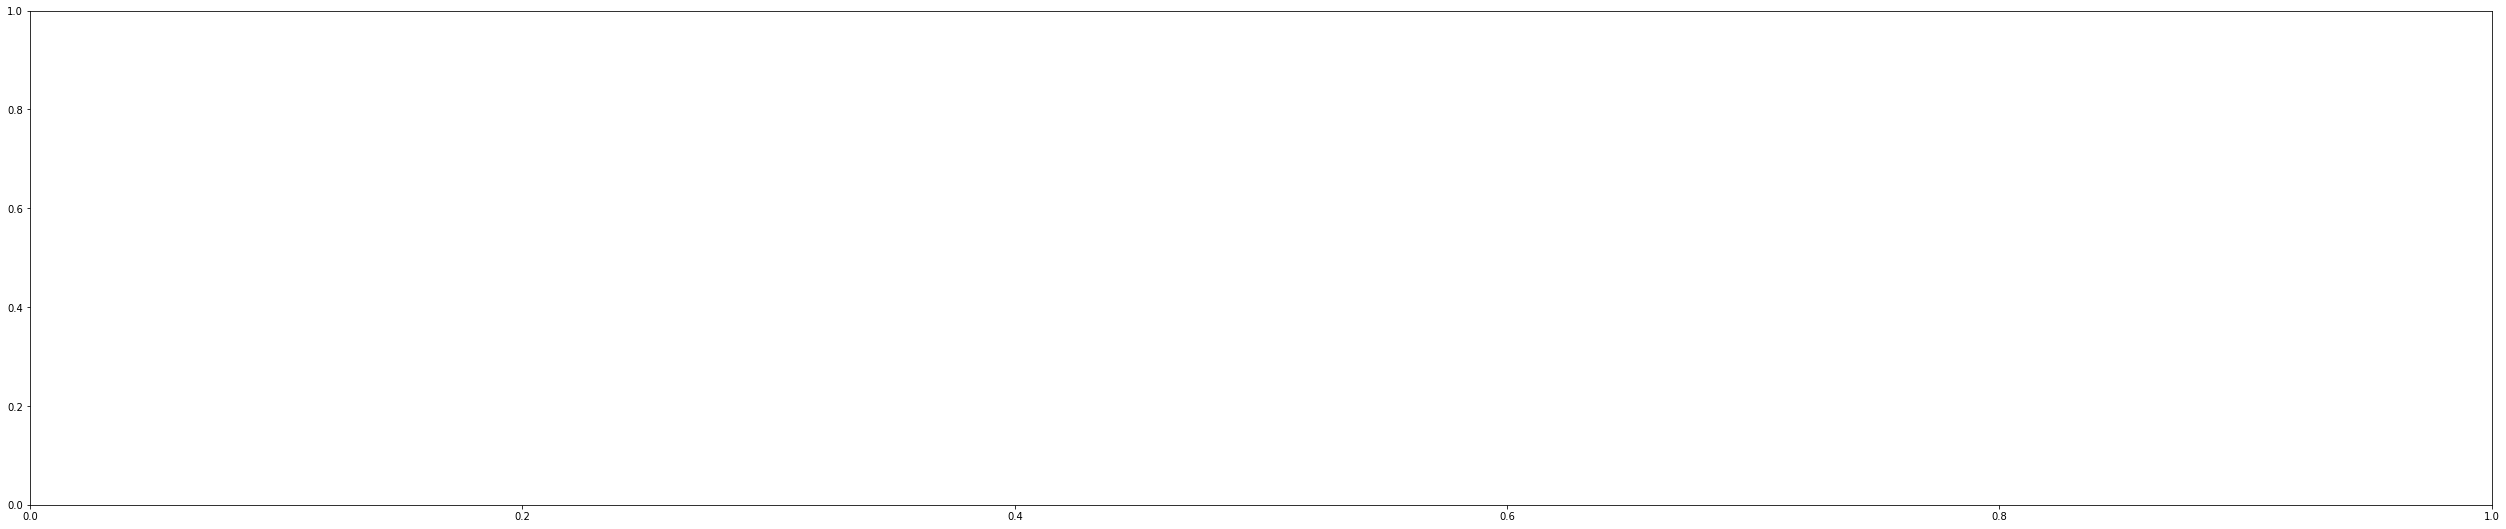

In [ ]:

plt.figure(figsize=(150, 20))
plt.subplot(2,3,1)
sns.boxplot(x = 'reason', y = 'grade', data = grade_loan)

plt.show()

Insights
* credit card loan is safe
* house & small business loan is risky

In [ ]:
plt.figure(figsize=(150, 20))
plt.subplot(2,3,2)
sns.boxplot(x = 'state', y = 'grade', data = grade_loan)
plt.show()

In [ ]:
# Build boxplot of all categorical variables (before creating dummies) againt the target variable 'grade' 
# to see how each of the predictor variable stackup against the target variable.

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'term', y = 'grade', data = grade_loan)

plt.subplot(2,3,2)
sns.boxplot(x = 'rate', y = 'grade', data = grade_loan)

plt.subplot(2,3,3)
sns.boxplot(x = 'length', y = 'grade', data = grade_loan)

plt.subplot(2,3,4)
sns.boxplot(x = 'home', y = 'grade', data = grade_loan)

plt.subplot(2,3,5)
sns.boxplot(x = 'verified', y = 'grade', data = grade_loan)

plt.subplot(2,3,6)
sns.boxplot(x = 'income', y = 'grade', data = grade_loan)

plt.subplot(2,4,1)
sns.boxplot(x = 'amount', y = 'grade', data = grade_loan)
plt.show()

Insights

There were 9 categorical variables in the dataset.

We used Box plot (refer the fig above) to study their effect on the dependent variable (grade) .

The inference that We could derive were:
* term: lower term more safe than long loke 60 months
* rate : till mean value .13 is safe or D type risk
* length : job length have not have any contribution for fraud
* home: home also have no contribution to frauds
* verified: it denotes data is varified but all types are belong to safe range

In [ ]:
plt.figure(figsize=(25, 10))

plt.subplot(2,4,1)
sns.boxplot(x = 'reason', y = 'grade', data = grade_loan)

plt.subplot(2,4,2)
sns.boxplot(x = 'delinq2yr', y = 'grade', data = grade_loan)

plt.subplot(2,4,3)
sns.boxplot(x = 'inq6mth', y = 'grade', data = grade_loan)
plt.show()

In [ ]:
loan_copy2=df_loan.copy()

In [ ]:
loan_copy2.nunique()

In [ ]:
loan_copy2['length'].fillna(loan_copy2['length'].mode()[0], inplace = True)


In [ ]:
length = pd.crosstab(loan_copy2['length'], loan_copy2['grade'])
length.div(length.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (14,4))
plt.show()